In [101]:
# !pip install ydata-profiling

In [102]:
# !pip list | grep ydata-profiling

In [103]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pandasのカラムが100列まで見れるようにする
pd.set_option("display.max_columns", 100)

In [104]:
# trainデータの読み込み
df_train = pd.read_csv("train.csv")

In [105]:
# ydata-profilingを利用
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df_train)

In [106]:
# profile.to_file(output_file='report.html')

In [107]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
df_train.shape

(1460, 81)

In [109]:
# 目的変数`SalePrice`のカラムを取り出しておく
y_train = df_train["SalePrice"]

In [110]:
# testデータの読み込み
df_test = pd.read_csv("test.csv")

In [111]:
# trainデータとtestデータを結合する
df_all = pd.concat([df_train.drop(columns="SalePrice"), df_test])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [112]:
# データの前処理をまとめた関数
def data_pre(df):
    # 欠損値処理

    ### 試し
    ###  欠損値が90％以上のカラムを除去
    df = df.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"])

    # 文字列の変数の欠損は「'None'」、数字の変数の欠損は「0」で埋める
    for colum in df.columns:
        # object型の場合
        if df[colum].dtype == "object":
            df[colum].fillna("None", inplace=True)
        # 数値型の場合
        else:
            df[colum].fillna(0, inplace=True)

    ## 加えたら精度が落ちたため、コメントアウト
    # 特徴量エンジニアリング
    # TotalSF(総面積)を新たな特徴量として加える
    # df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # 数値型のカテゴリ変数をObject型のカテゴリ変数に変換
    df["MSSubClass"] = df["MSSubClass"].astype("category")
    df["YrSold"] = df["YrSold"].astype("category")
    df["MoSold"] = df["MoSold"].astype("category")
    df["OverallCond"] = df["OverallCond"].astype(str)

    # Object型をダミー変数化(カテゴリ変数化)
    df = pd.get_dummies(df)

    return df

In [113]:
df_all = data_pre(df_all)

In [114]:
# trainデータとtestデータに分割してもとに戻す
df_train = df_all[: len(df_train)]
df_train["SalePrice"] = y_train
df_test = df_all[len(df_train) :]
len(df_all) == len(df_train) + len(df_test)  # True

/tmp/ipykernel_7833/3698094283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["SalePrice"] = y_train


True

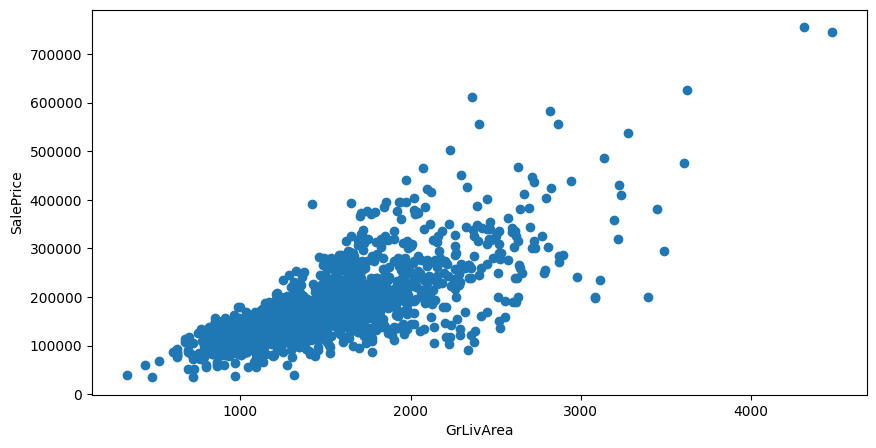

In [115]:
# GrLivAreaの2件の外れ値を除去
df_train = df_train.drop(
    df_train[(df_train["GrLivArea"] > 4000) & (df_train["SalePrice"] < 300000)].index
)

# GrLivAreaとの散布図 (外れ値除去後)
plt.figure(figsize=(10, 5))

plt.scatter(df_train["GrLivArea"], df_train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

plt.show()

数値型のカラム：Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')
数値型のカラム数：34


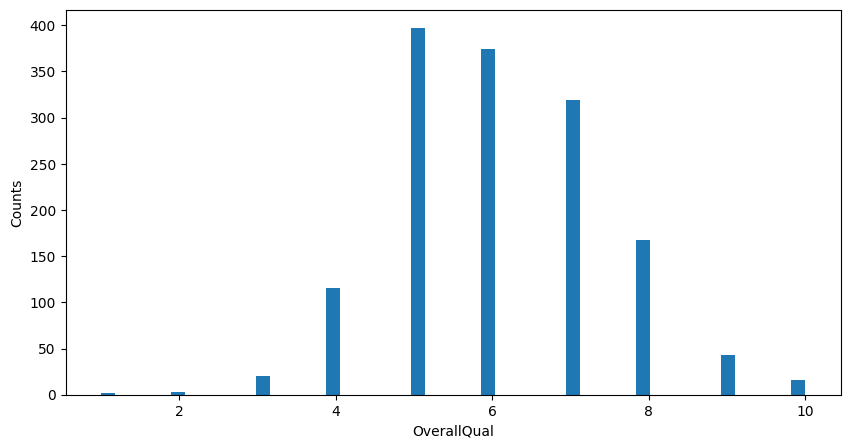

In [116]:
# 数値型のカラムのみ抽出
numeric_df = df_train.select_dtypes(include=np.number)
print("数値型のカラム：{}".format(numeric_df.columns))
print("数値型のカラム数：{}".format(len(numeric_df.columns)))

# 相関係数行列
# SalePriceと相関係数が高い順にソート
corr_with_SalePrice = numeric_df.corr()["SalePrice"].sort_values(ascending=False)

# 相関係数が高いカラムを見ていく
plt.figure(figsize=(10, 5))
# OverallQual(全体的な品質)のヒストグラム
plt.hist(df_train["OverallQual"], bins=50)
plt.xlabel("OverallQual")
plt.ylabel("Counts")
plt.show()

In [117]:
# 検索すると対数変換をする必要がある
# ただ、理由が分からないので調べる必要あり

# SalePriceを対数変換
df_train["SalePriceLog"] = np.log(df_train["SalePrice"])

In [118]:
df_train.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,SalePriceLog
0,1,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,208500,12.247694
1,2,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,181500,12.109011
2,3,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,223500,12.317167
3,4,60.0,9550,7,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,140000,11.849398
4,5,84.0,14260,8,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,250000,12.429216


In [119]:
### SalePriceと相関が高いカラム
#  1stFlrSF, GarageYrBlt,GarageArea,GrLivArea, OverallQual, PoolQC,TotalBsmtSF, TotRmsAbvGrd, YearBuilt, YearRemodAdd

#  [ "1stFlrSF", "GarageYrBlt", "GarageArea", "GrLivArea", "OverallQual", "PoolQC", "TotalBsmtSF", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd" ]

In [120]:
# モデル構築のためのライブラリ
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 訓練データと検証データに分割
train, valid = train_test_split(df_train, test_size=0.2)

# 説明変数と目的変数を定義
tar = "SalePriceLog"
train_y = train[tar]
train_x = train.drop([tar, "SalePrice", "Id"], axis=1)
val_y = valid[tar]
val_x = valid.drop([tar, "SalePrice", "Id"], axis=1)

# train_y = train["SalePriceLog"]
# train_x = train[[ "1stFlrSF", "GarageYrBlt", "GarageArea", "GrLivArea", "OverallQual","TotalBsmtSF", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd" ]]
# val_y = valid["SalePriceLog"]
# val_x = valid[[ "1stFlrSF", "GarageYrBlt", "GarageArea", "GrLivArea", "OverallQual", "TotalBsmtSF", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd" ]]


# lgbのデータセット型に直す
# trains = lgb.Dataset(train_x, train_y)
# valids = lgb.Dataset(val_x, val_y)

# モデルのパラメータを定義
params = {
    "objective": "regression",
    "metric": "rmse",
    "random_state": 42,
    "learning_rate": 0.05,  # 学習率
    "n_estimators": 10000,  # 繰り返し回数
    "verbose": -1,  # ログを最後の1つだけ表示
}

In [121]:
model = lgb.LGBMRegressor(**params)
model.fit(
    train_x,
    train_y,
    # トレーニングデータと検証データを指定
    eval_set=[
        (train_x, train_y),
        (val_x, val_y),
    ],
    callbacks=[
        lgb.early_stopping(
            stopping_rounds=100, verbose=True
        ),  # 100回以上改善がない場合、学習を終了
    ],
)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	training's rmse: 0.0704878	valid_1's rmse: 0.131388


LGBMRegressor(learning_rate=0.05, metric='rmse', n_estimators=10000,
              objective='regression', random_state=42, verbose=-1)

In [122]:
# RMSE、MAE、R2
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

# RMSE (今回の指標)
print("RMSE(訓練データ)", round(rmse(train_y, model.predict(train_x)), 5))
print("RMSE(検証データ)", round(rmse(val_y, model.predict(val_x)), 5))

print("MAE(訓練データ)", round(mae(train_y, model.predict(train_x)), 5))
print("MAE(検証データ)", round(mae(val_y, model.predict(val_x)), 5))
print(
    "RMSE/MAE(訓練データ)",
    round(
        rmse(train_y, model.predict(train_x)) / mae(train_y, model.predict(train_x)), 5
    ),
)
print(
    "RMSE/MAE(検証データ)",
    round(rmse(val_y, model.predict(val_x)) / mae(val_y, model.predict(val_x)), 5),
)
print("決定係数(訓練データ)", round(r2_score(train_y, model.predict(train_x)), 5))
print("決定係数(検証データ)", round(r2_score(val_y, model.predict(val_x)), 5))

RMSE(訓練データ) 0.07049
RMSE(検証データ) 0.13139
MAE(訓練データ) 0.0468
MAE(検証データ) 0.08993
RMSE/MAE(訓練データ) 1.50608
RMSE/MAE(検証データ) 1.46099
決定係数(訓練データ) 0.96987
決定係数(検証データ) 0.87566


In [130]:
# 特徴量重要度
feature_importance = pd.DataFrame(
    model.feature_importances_, index=train_x.columns, columns=["importance"]
).sort_values("importance", ascending=False)
feature_importance.head(10)

,importance
GrLivArea,281
LotArea,169
TotalBsmtSF,149
BsmtFinSF1,143
YearBuilt,138
GarageArea,128
YearRemodAdd,111
OverallQual,110
1stFlrSF,105
GarageYrBlt,92


In [124]:
# 構築したモデルを使い、テストデータ(df_test)を予測
pred_log = model.predict(df_test.drop(columns=["Id"]))

# 予測値を元のスケールに戻す
pred = np.exp(pred_log)
pred = pd.Series(pred)

# Idとpredを結果として結合
result = pd.concat([df_test["Id"], pred], axis=1)
result.columns = ["Id", "SalePrice"]
result.head()

,Id,SalePrice
0,1461,126114.924645
1,1462,156977.848377
2,1463,185796.733809
3,1464,193751.200337
4,1465,188579.580114


In [1]:
# resultをcsvファイルで出力
# result.to_csv("submit.csv", index=False)